**Problem Statement:-**
***Extracting Insights from Google Play Store Data for App Performance and Marketing Optimization.***




**Google Play Store Data Set Cleaning, Analysing and Visualising in Python**

In [1]:
# Importing necessary libraries for data manipulation, analysis, and visualization
import numpy as np       # NumPy for numerical operations and array handling
import pandas as pd      # Pandas for data  analysis
import matplotlib.pyplot as plt  # Matplotlib for creating visualizations

In [2]:
# Reading data from the 'googleplaystore.csv' file into a Pandas DataFrame
GPData='googleplaystore.csv'
GPDf=pd.read_csv(GPData)

**Google Play Store Data Analysis**

In [3]:
# Read the first five row of the dataset
GPDf.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [4]:
# Displaying a concise summary of the DataFrame's information
GPDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          9366 non-null   float64
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


**Total data entry, 10840. Total column is 13 and row is 10840.Index starting from 0 to 10839. Rating,Current Ver , Android Ver  columns have some missing values.Rating column has contained float data type and Reviews column has integer data type and the rest have object type data.**

In [5]:
# Generating descriptive statistics for the DataFrame
GPDf.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [6]:
# Generating descriptive statistics for columns with object (categorical) data types
GPDf.describe(include=object)

,App,Category,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10840,10840,10840,10840,10839,10840,10840,10840,10840,10832,10838
unique,9659,33,461,21,2,92,6,119,1377,2783,33
top,ROBLOX,FAMILY,Varies with device,"1,000,000+",Free,0,Everyone,Tools,03-Aug-18,Varies with device,4.1 and up
freq,9,1972,1695,1579,10039,10040,8714,842,326,1459,2451


In [7]:
# Counting the number of missing values (null) in each column of the DataFrame
GPDf.isnull().sum()

Rating            1474
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

**Here, we can see that, here the column "Rating", "Type", "Current Ver" and "Android Ver" have the null values in the dataframe.**

In [8]:
# Counting the occurrences of duplicated rows in the DataFrame
GPDf.duplicated().value_counts()

False    10357
True       483
Name: count, dtype: int64

 **Here we can see that 483 duplicate rows are present in the given Dataframe**

**Data Cleaning**

In [9]:
# Dropping duplicate rows from the DataFrame in-place
GPDf.drop_duplicates(inplace=True)
# Counting the occurrences of duplicated rows after removing duplicates
GPDf.duplicated().sum()

0

In [10]:
GPDf.duplicated().value_counts()

False    10357
Name: count, dtype: int64

In [11]:
GPDf.isnull().sum()

Rating            1465
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [12]:
# Filling missing values in the 'Rating' column with the mean value in-place
GPDf['Rating'].fillna(GPDf['Rating'].mean(),inplace=True)
# Counting the occurrences of remaining missing values in the 'Rating' column
GPDf['Rating'].isnull().sum()

0

**1465 null values present in the Rating column. If we drop all the null value from the this columns, then it will impact a huge difference in the result. That's why we use, fillna() method. After filling the null values with mean value, the isnull().sum() returns 0. That means, all the null values are filled.**

In [13]:
# Counting the occurrences of missing values in the 'Type' column
GPDf['Type'].isnull().sum()

1

In [14]:
# Print rows in the 'Type' column where values are null
print("\nShow the rows in Type Column, which contain the null values ")
GPDf[GPDf['Type'].isnull()]


Show the rows in Type Column, which contain the null values 


,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,4.187877,Command & Conquer: Rivals,FAMILY,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,28-Jun-18,Varies with device,Varies with device


In [15]:
# Dropping rows with missing values in the 'Type' column in-place
GPDf.dropna(subset=['Type'],inplace=True)
# Counting the occurrences of missing values in the 'Type' column
GPDf['Type'].isnull().sum()

0

In [16]:
# Counting the occurrences of missing values in each column of the DataFrame for our work convenience
GPDf.isnull().sum()

Rating            0
App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [17]:
# Print rows in the 'Current Ver' column where values are null
print("\n The rows in Current Version Column, which contain the null values")
GPDf[GPDf['Current Ver'].isnull()]


 The rows in Current Version Column, which contain the null values


,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,3.200000,Learn To Draw Kawaii Characters,ART_AND_DESIGN,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,06-Jun-18,NaN,4.2 and up
1553,4.100000,Market Update Helper,LIBRARIES_AND_DEMO,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,12-Feb-13,NaN,1.5 and up
6322,4.200000,Virtual DJ Sound Mixer,TOOLS,4010,8.7M,"500,000+",Free,0,Everyone,Tools,10-May-17,NaN,4.0 and up
6803,4.187877,BT Master,FAMILY,0,222k,100+,Free,0,Everyone,Education,06-Nov-16,NaN,1.6 and up
7333,4.000000,Dots puzzle,FAMILY,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,18-Apr-18,NaN,4.0 and up
7407,4.187877,Calculate My IQ,FAMILY,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,03-Apr-17,NaN,2.3 and up
7730,4.187877,UFO-CQ,TOOLS,1,237k,10+,Paid,$0.99,Everyone,Tools,04-Jul-16,NaN,2.0 and up
10342,4.187877,La Fe de Jesus,BOOKS_AND_REFERENCE,8,658k,"1,000+",Free,0,Everyone,Books & Reference,31-Jan-17,NaN,3.0 and up


In [18]:
# Filling missing values in the 'Current Ver' column with 'Based on Device' in-place
GPDf['Current Ver'].fillna(value='Based on Device',inplace=True)
# Counting the occurrences of remaining missing values in the 'Current Ver' column
GPDf['Current Ver'].isnull().sum()

0

In [19]:
# Print rows in the 'Android Ver' column where values are null
print("\nThe rows in Android Version Column, which contain the null values")
GPDf[GPDf['Android Ver'].isnull()]


The rows in Android Version Column, which contain the null values


,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,4.4,[substratum] Vacuum: P,PERSONALIZATION,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,20-Jul-18,4.4,NaN
4490,4.5,Pi Dark [substratum],PERSONALIZATION,189,2.1M,"10,000+",Free,0,Everyone,Personalization,27-Mar-18,1.1,NaN


In [20]:
# Filling missing values in the 'Android Ver' column with 'Based on Android Ver' in-place
GPDf['Android Ver'].fillna(value='Based on Android Ver',inplace=True)
# Counting the occurrences of remaining missing values in the 'Android Ver' column
GPDf['Android Ver'].isnull().sum()

0

In [21]:
# Counting the occurrences of missing values in each column of the DataFrame
GPDf.isnull().sum()

Rating            0
App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [22]:
# Displaying a concise summary of the DataFrame's information
GPDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10356 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          10356 non-null  float64
 1   App             10356 non-null  object 
 2   Category        10356 non-null  object 
 3   Reviews         10356 non-null  int64  
 4   Size            10356 non-null  object 
 5   Installs        10356 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10356 non-null  object 
 8   Content Rating  10356 non-null  object 
 9   Genres          10356 non-null  object 
 10  Last Updated    10356 non-null  object 
 11  Current Ver     10356 non-null  object 
 12  Android Ver     10356 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [23]:
# Descriptive statistics for the 'Category' column (object data type)
GPDf['Category'].describe(include=object)

count      10356
unique        33
top       FAMILY
freq        1942
Name: Category, dtype: object

In [24]:
# Creating a pivot table to count the number of unique apps for each category
category_App_Pivot=pd.pivot_table(GPDf,index=['Category'],values=['App'],aggfunc='count')
# Printing the resulting pivot table
print(category_App_Pivot)

                      App
Category                 
ART_AND_DESIGN         65
AUTO_AND_VEHICLES      85
BEAUTY                 53
BOOKS_AND_REFERENCE   230
BUSINESS              427
COMICS                 60
COMMUNICATION         366
DATING                196
EDUCATION             130
ENTERTAINMENT         111
EVENTS                 64
FAMILY               1942
FINANCE               360
FOOD_AND_DRINK        124
GAME                 1121
HEALTH_AND_FITNESS    306
HOUSE_AND_HOME         80
LIBRARIES_AND_DEMO     85
LIFESTYLE             373
MAPS_AND_NAVIGATION   137
MEDICAL               408
NEWS_AND_MAGAZINES    264
PARENTING              60
PERSONALIZATION       388
PHOTOGRAPHY           322
PRODUCTIVITY          407
SHOPPING              224
SOCIAL                280
SPORTS                351
TOOLS                 843
TRAVEL_AND_LOCAL      237
VIDEO_PLAYERS         175
WEATHER                82


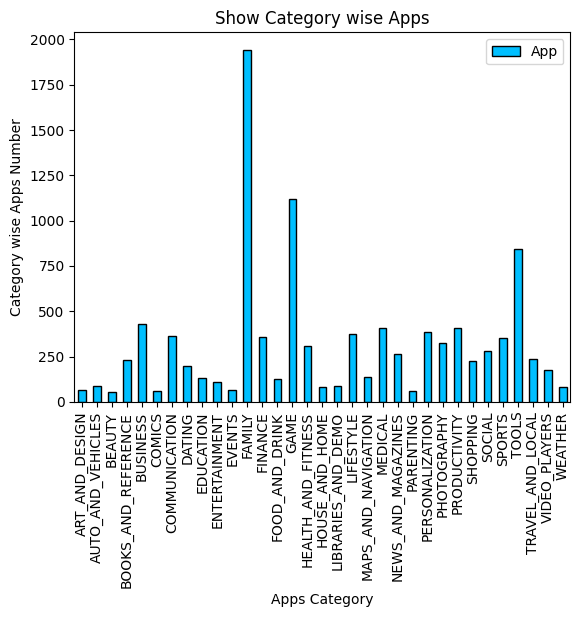

In [25]:
# Creating a bar plot for the Category-wise count of Apps
category_App_Pivot.plot(kind='bar',color='DeepSkyBlue',edgecolor='black')
# Adding title and labels to the plot
plt.title("Show Category wise Apps")
plt.xlabel("Apps Category")
plt.ylabel("Category wise Apps Number")
# Displaying the plot
plt.show()

***The graph displays the number of apps available in various categories. The “Family” category has the highest number of apps,followed by “Game” and “Tools”. Most other categories have a relatively similar and lower number of apps***

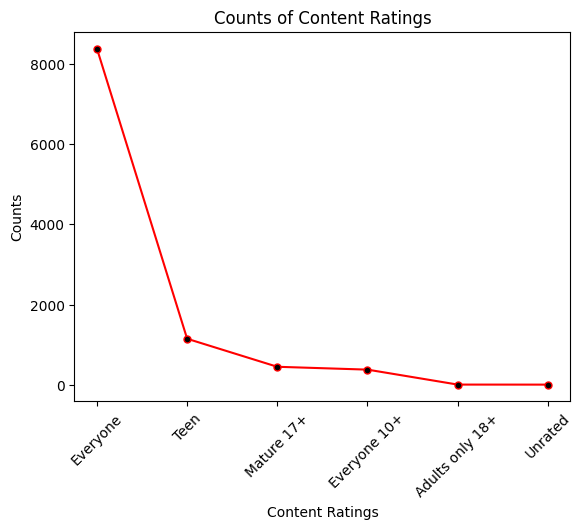

In [26]:
# Creating a line chart to visualize  the Counts of Content Ratings
content_rating_counts = GPDf['Content Rating'].value_counts()
content_rating_counts.plot(kind='line', marker='o', color='red', linestyle='-', markerfacecolor='black', markersize=5)
# Set chart title and labels
plt.title('Counts of Content Ratings')
plt.xlabel('Content Ratings')
plt.ylabel('Counts')

# Rotate x-axis labels
plt.xticks(rotation=45) 

# Show the line chart
plt.show()

**The majority of contents are rated for “Everyone,” with the count exceeding 8000. However, there is a sharp decline in counts for the “Teen” rating and it continues to decrease across other categories: “Mature 17+”, “Everyone 10+”, “Adults only 18+”, and “Unrated.” The graph indicates that most content is made accessible to everyone, while specific age-rated and unrated contents are considerably less common.**

In [27]:
# Creating a pivot table to find the maximum values of 'Rating' and 'App' for each category
pd.pivot_table(GPDf,index=['Category',],values=['Rating','App'],aggfunc='max')

,App,Rating
Category,,
ART_AND_DESIGN,صور حرف H,5.0
AUTO_AND_VEHICLES,Билеты ПДД CD 2019 PRO,4.9
BEAUTY,"ipsy: Makeup, Beauty, and Tips",4.9
BOOKS_AND_REFERENCE,日本AV历史,5.0
BUSINESS,sABN,5.0
COMICS,감성학원 BL 첫사랑,5.0
COMMUNICATION,哈哈姆特不EY,5.0
DATING,stranger chat - anonymous chat,5.0
EDUCATION,"play2prep: ACT, SAT prep",4.9


In [28]:
# Creating a pivot table to find the top 10 entries with the highest ratings for each app within each category
GPDf.pivot_table(index=['App','Category'], values='Rating', aggfunc='max').nlargest(10, 'Rating')

,,Rating
App,Category,
211:CK,GAME,5.0
30WPM Amateur ham radio Koch CW Morse code trainer,FAMILY,5.0
420 BZ Budeze Delivery,MEDICAL,5.0
A-Y Collection,SHOPPING,5.0
AC DC Power Monitor,LIFESTYLE,5.0
ADS-B Driver,TOOLS,5.0
AI Today : Artificial Intelligence News & AI 101,NEWS_AND_MAGAZINES,5.0
AJ Blue Icon Pack,PERSONALIZATION,5.0
AJ Cam,PHOTOGRAPHY,5.0


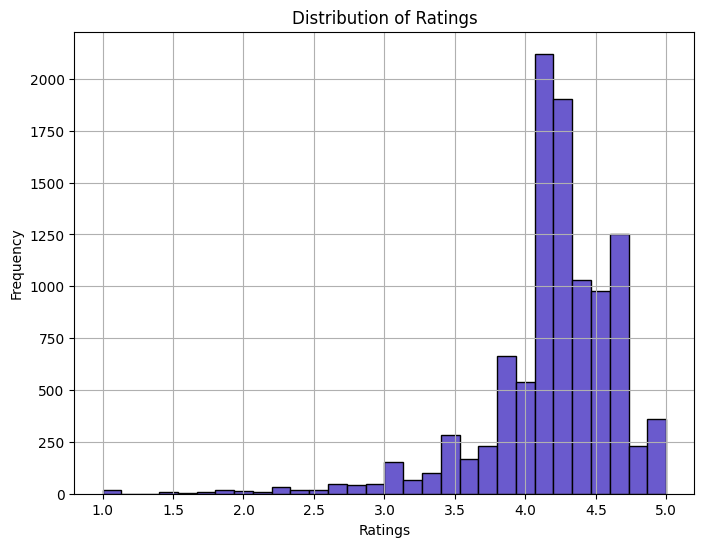

In [29]:
# Creating a histogram to visualize the distribution of Ratings
plt.figure(figsize=(8, 6))
plt.hist(GPDf['Rating'], bins=30, color='SlateBlue', edgecolor='black')
# Adding title and labels to the plot
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
# Adding grid for better readability
plt.grid(True)
# Displaying the plot
plt.show()

**The graph depicts the distribution of ratings, with a concentration of higher ratings between 4.0 and 4.5. There are fewer instances of lower ratings, indicating that the majority of the rated items or services received positive feedback.**

In [30]:
# Displaying the top 10 apps with the highest number of reviews and their categories
print("\nTop 10 heighest Reviews apps with their category")
pd.pivot_table(GPDf,index=['App','Category'],values=['Reviews'],aggfunc='max').nlargest(10,'Reviews')


Top 10 heighest Reviews apps with their category


Reviews
App                                                Category               
Facebook                                           SOCIAL         78158306
WhatsApp Messenger                                 COMMUNICATION  69119316
Instagram                                          SOCIAL         66577446
Messenger – Text and Video Chat for Free           COMMUNICATION  56646578
Clash of Clans                                     GAME           44893888
                                                   FAMILY         44881447
Clean Master- Space Cleaner & Antivirus            TOOLS          42916526
Subway Surfers                                     GAME           27725352
YouTube                                            VIDEO_PLAYERS  25655305
Security Master - Antivirus, VPN, AppLock, Booster TOOLS          24900999

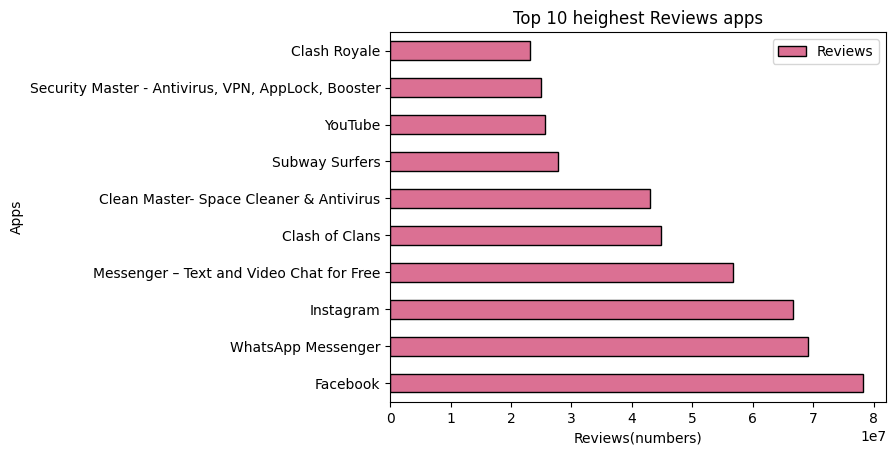

In [31]:
# Creating a horizontal bar plot for the top 10 apps with the highest number of reviews
Reviews_app=pd.pivot_table(GPDf,index=['App'],values=['Reviews'],aggfunc='max').nlargest(10,'Reviews')
Reviews_app.plot(kind='barh',color='PaleVioletRed',edgecolor='black')
# Adding title and labels to the plot
plt.title("Top 10 heighest Reviews apps")
plt.xlabel("Reviews(numbers)")
plt.ylabel("Apps")
# Displaying the plot
plt.show()

**The graph illustrates the top 10 highest reviewed apps.Facebook has the highest number of reviews & Clash Royale has the least number of reviews among the listed apps.**


In [32]:
# Displaying the 10 apps with the lowest number of reviews and their categories
print("\n10 Lowest Reviews apps with their category:-")
pd.pivot_table(GPDf,index=['Category','App'],values=['Reviews'],aggfunc='max').nsmallest(10,'Reviews')


10 Lowest Reviews apps with their category:-


Reviews
Category            App                                           
ART_AND_DESIGN      Test Application DT 02                       0
AUTO_AND_VEHICLES   AJ AUTO                                      0
                    Dashboard AE                                 0
                    SpeedApp EV                                  0
                    eP Finder                                    0
BEAUTY              Aura Hair Group BC                           0
                    Calvin Klein Petite Dresses                  0
BOOKS_AND_REFERENCE Ag PhD Planting Population Calculator        0
                    Ag PhD Soybean Diseases                      0
                    Anime Mod for BM                             0

In [33]:
# Creating a pivot table to count the number of apps for each 'Type' category
pd.pivot_table(GPDf,index=['Type'],values=['App'],aggfunc=['count'])

,count
,App
Type,
Free,9591
Paid,765


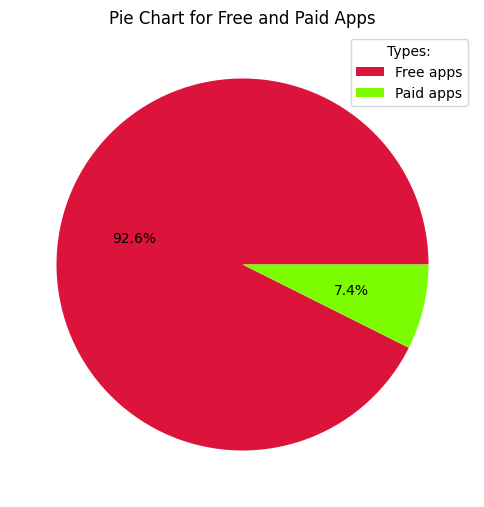

In [34]:
# Creating a pivot table to count the number of apps for each 'Type' category
Type_Apps=pd.pivot_table(GPDf,index=['Type'],values=['App'],aggfunc=['count'])
# Extracting values and labels for the pie chart
values = Type_Apps.values.flatten()
Type_labels=["Free apps","Paid apps"]
# Plotting a pie chart to show the distribution of free and paid apps
plt.figure(figsize=(6,8))
plt.title("Pie Chart for Free and Paid Apps")
plt.pie(values, autopct='%1.1f%%',colors=["Crimson","LawnGreen"])
# Adding legend with type labels
plt.legend(title='Types:',labels=Type_labels)
# Displaying the pie chart
plt.show()

**This pie chart is representing the distribution between free and paid apps. A significant majority, 92.6%, of the apps are free, while only a small portion, 7.4%, are paid.**

**CONCLUSION:**


***The Google Play Store dataset comprises approximately 10,356 entries accross various categories and apps.Total number of apps 10356 and Category is 33 and there are  2 type of apps available, one is free and another is paid.***

***Also, we can see, "Family" category has the most number of apps(1942) contained.***


***Most of the apps are available for everyone, some apps have age restriction.***

***Facebook has got the highest number reviews(78158306) from users, that means Facebook is most widely used app in Google Play Store.***

***It includes essential information like app ratings, reviews, installs, pricing, and compatibility, making it suitable for diverse analytical insights into app performance, user preferences, and market trends.***